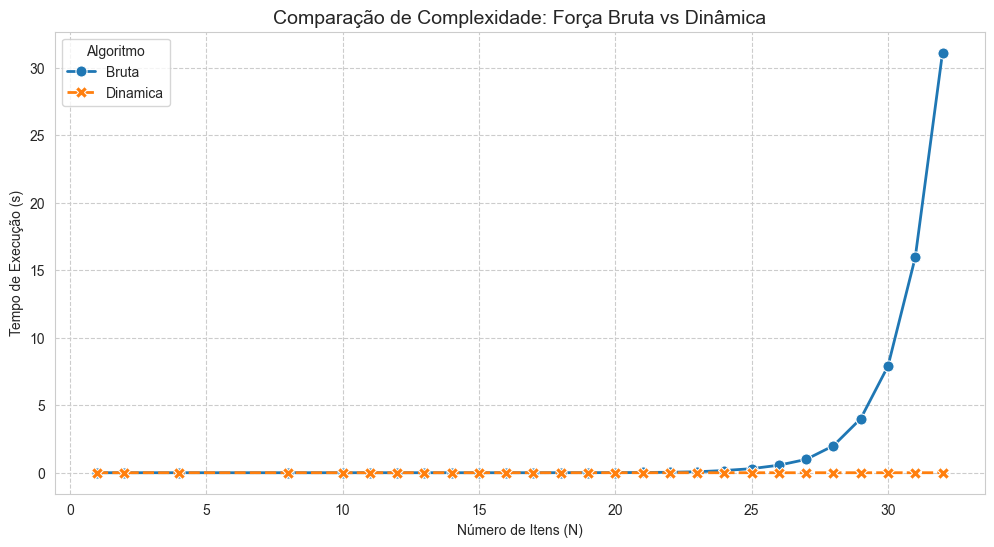

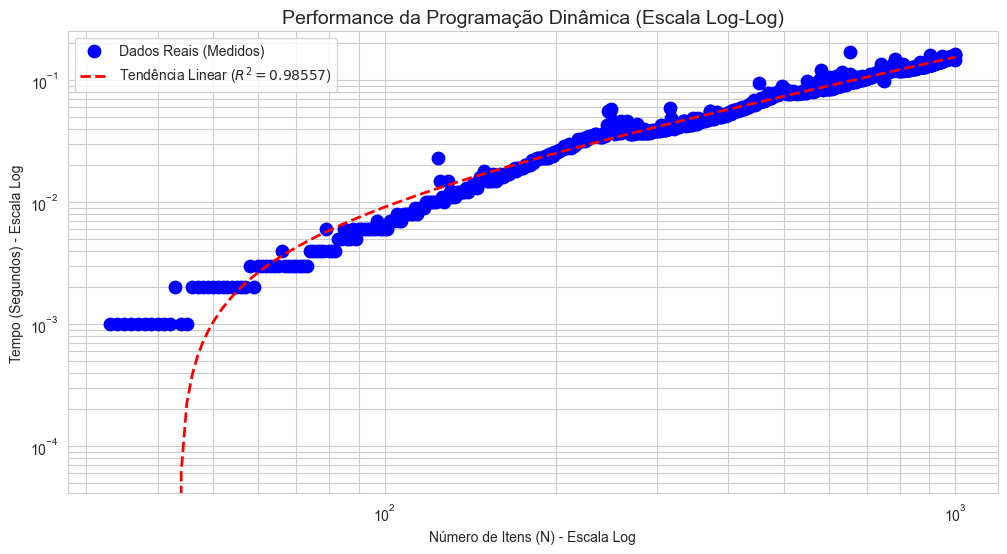

ANÁLISE CONCLUÍDA:
O R² é 0.985574. Isso prova matematicamente que o algoritmo é O(N).


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

colunas = ['Algoritmo', 'N_Itens', 'Capacidade_Mochila', 'Tempo_Segundos', 'Valor_Maximo']
df = pd.read_csv('data.csv', header=0, names=colunas)


sns.set_style("whitegrid")

# ==============================================================================
# GRÁFICO 1: O "Muro" da Força Bruta (Comparação)
# ==============================================================================
plt.figure(figsize=(12, 6))

# Filtrar dados menores ou iguais a 32 (onde tem as duas implementações)
df_pequeno = df[df['N_Itens'] <= 32].copy()

sns.lineplot(data=df_pequeno, x='N_Itens', y='Tempo_Segundos', hue='Algoritmo', style='Algoritmo', markers=True, markersize=8, linewidth=2)

plt.title('Comparação de Complexidade: Força Bruta vs Dinâmica', fontsize=14)
plt.ylabel('Tempo de Execução (s)')
plt.xlabel('Número de Itens (N)')
plt.grid(True, which='both', linestyle='--')
plt.savefig('grafico_comparativo.png', dpi=300)
plt.show()

# ==============================================================================
# GRÁFICO 2: Prova de Linearidade (Escala Logarítmica)
# ==============================================================================
plt.figure(figsize=(12, 6))

# Filtrar APENAS a Dinâmica e APENAS os testes grandes
df_grande = df[(df['Algoritmo'] == 'Dinamica') & (df['N_Itens'] > 32)].copy()

if not df_grande.empty:
    # Plotar os pontos reais
    plt.scatter(df_grande['N_Itens'], df_grande['Tempo_Segundos'], color='blue', s=80, label='Dados Reais (Medidos)')

    # Calcular Regressão Linear
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_grande['N_Itens'], df_grande['Tempo_Segundos'])
    line = slope * df_grande['N_Itens'] + intercept

    # Plotar linha de tendência
    plt.plot(df_grande['N_Itens'], line, 'r--', linewidth=2, label=f'Tendência Linear ($R^2={r_value**2:.5f}$)')

    plt.xscale('log') # Escala Logarítmica no Eixo X
    plt.yscale('log') # Escala Logarítmica no Eixo Y também ajuda a ver a reta melhor
    
    plt.title('Performance da Programação Dinâmica (Escala Log-Log)', fontsize=14)
    plt.ylabel('Tempo (Segundos) - Escala Log')
    plt.xlabel('Número de Itens (N) - Escala Log')
    plt.legend()
    plt.grid(True, which="both", ls="-")
    
    
    plt.savefig('grafico_linearidade.png', dpi=300)
    plt.show()
    
    print(f"ANÁLISE CONCLUÍDA:")
    print(f"O R² é {r_value**2:.6f}. Isso prova matematicamente que o algoritmo é O(N).")
else:
    print("Erro: Não foram encontrados dados para N > 32 no filtro 'Dinamica'. Verifique o CSV.")